<a href="https://colab.research.google.com/github/adilsaid64/Data-Science-Projects/blob/main/car%20_sale_price/LM_predicting_car_sales_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting car sales price
Aims:
- Exploratory Data Analysis
- Linear Regression Model to predict car prices


dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

>[Predicting car sales price](#scrollTo=zZCFrOFpOXy3)

>>[Loading the data](#scrollTo=1jWSdx3JPNrz)

>>[Some Data Cleaning](#scrollTo=OrUC3I0-UWaK)

>>>[Some cleaning and simplifying](#scrollTo=mpFbETkQcw58)

>>[Exploratory Data Analysis](#scrollTo=qd_FHepvOX2P)

>>>[Year and adding a column called age](#scrollTo=HPy2KjX5bQBj)

>>>[km_driven](#scrollTo=L1k24uoeAoj4)

>>>[fuel](#scrollTo=GpMe__jnq_ZE)

>>>[seller_type](#scrollTo=GMW70TIoQCFN)

>>>[transmission](#scrollTo=tau6k1zlTqgJ)

>>>[owner](#scrollTo=BdNzd_7YbwNl)

>>>[engine](#scrollTo=sB75wWaEpzAo)

>>>[max_power](#scrollTo=lc-ecxLZnbUm)

>>>[seats](#scrollTo=YAnbyZk5l_BB)

>>>[name](#scrollTo=PnI45w00-4Uz)

>>>[mileage](#scrollTo=piD_dgYT5JGi)

>>>[selling_price](#scrollTo=BQtWqut7KeVr)

>>[Data Preprocessing](#scrollTo=uM3-cotNoEZU)

>>>[Missing Data](#scrollTo=Jd9MiaO9W4p2)

>>>[Outliers](#scrollTo=tfzwpdjUnP-X)

>>>[Encoding catogorical variables](#scrollTo=nqq2-E1RiG5U)

>>[Correlation](#scrollTo=Uuz5nbyfm2Pp)

>>[Splitting independant variables (features) and dependant variable](#scrollTo=zj7ZH6JcqTLD)

>>[Model Building](#scrollTo=bCJfDObZ2zfW)

>>>[Splitting test and train](#scrollTo=OxRIKn1bWx6W)

>>>[MLM](#scrollTo=LwSFhtjTWv60)

>>[Questions that come up](#scrollTo=xrGCshKTR8xG)

>>[Summary](#scrollTo=-ivJxdxhR_lw)



##Loading the data

In [250]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

data_url = "https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho"

od.download(data_url)

Skipping, found downloaded files in "./vehicle-dataset-from-cardekho" (use force=True to force download)


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(10,6)
matplotlib.rcParams["figure.facecolor"]="#00000000"

In [358]:
df = pd.read_csv("/content/vehicle-dataset-from-cardekho/Car details v3.csv")

In [356]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [357]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [148]:
(df.isnull().sum())/len(df)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64

The data set looks very clean. Doesn't appear to contain any missing values. the last three columns have less than 3% null values, which is not a lot when compared to the size of the data set. So we will explore these values too.

However, certain columns like engine, max_power, and torque, would be easier to analyse if numerical. The columns contain string values, so we need to clean this.

Things to do:
1. Get rid of strings from columns mentioned
2. Dummy variables for categorical columns, owner, fuel, and seller_type.


##Some Data Cleaning
Objectives: 
1. Cleaning strings, and converting floats if appropiate
2. Taking care of nall values
3. Checking for strange outliers

###Some cleaning and simplifying

In [359]:
#dropping
df = df.drop("torque", axis=1)

In [360]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [361]:
#get rid of cc
df["engine"] = df["engine"].str.replace(" CC", "")

In [362]:
#getting rid of "bhp"
df["max_power"] = df["max_power"].str.replace(" bhp", "")

In [363]:
#getting rid of kmpl
df["mileage"] = df["mileage"].str.replace(" kmpl", "")

In [364]:
#getting rid of the remaining strings
df["mileage"] = df["mileage"].str.replace(" km/kg", "")

In [365]:
#converting data type
df["mileage"] = df["mileage"].astype(float)

In [366]:
#replacing cells that contain empty space with np.nan
df = df.replace("", np.nan)         

In [367]:
df["max_power"] = df["max_power"].astype(float)

CC means cubic centimetres. With some googling, I learnt that car engine sizes are specified in litres, and usually rounded to the nearest tenth of a litre. So for example a 1390CC engine is a 1.4L car.

I'm going to clean this column and put things into a different format.

Todo this calculation, I will, divide each value by 1000, then round it to one decimal place, to hopefully clean things ups.

1248CC and 1197CC are the top two, engine sizes. But we can reduce this two just 1, since both cars have around 1.2Ls engines. 

In [368]:
#converting the column to a float
df.engine = df.engine.astype(float)

#dividing by 1000, rounding to one dp
df.engine = round(df.engine/1000, 1)

In [369]:
df["engine"]

0       1.2
1       1.5
2       1.5
3       1.4
4       1.3
       ... 
8123    1.2
8124    1.5
8125    1.2
8126    1.4
8127    1.4
Name: engine, Length: 8128, dtype: float64

The column is now reduced, making it easier to analyse, while still retaining the important information about the types of engines the car have.

It might be intresting to categorise cars engines more. 
1. [0, 1] litre, S
2. (1,2] litre, M
3. (2-3] litre, L
4. (3, more) litre, XL



##Exploratory Data Analysis
Exploring columns in the dataset.

###Year and adding a column called age

In [370]:
df["age"] = 2022-df["year"]

In [161]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15


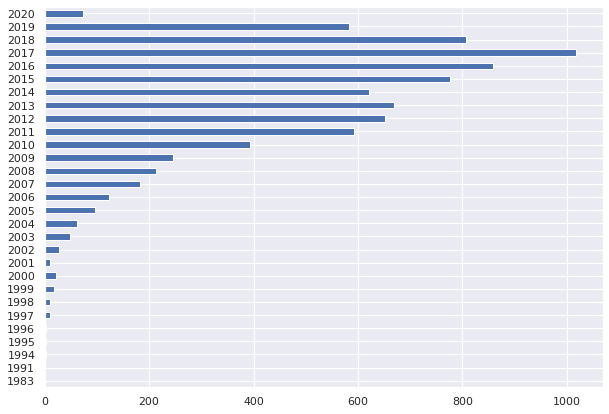

In [162]:
df["year"].value_counts().sort_index().plot(kind = "barh")

From where the data was sampled, there doesn't seem to be many cars in the market in 2020. What could be the reasons for this?  Maybe the data was not collected at the end of the year and some time at the beginning, or, cars in 2020, are generally more new, maybe not many are on the market? or it could have something to do with the type of seller?

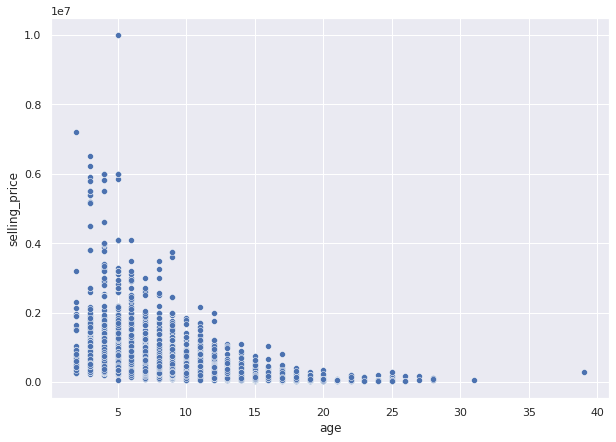

In [163]:
#Looking at how age affects car price
sns.scatterplot(data = df, x= "age", y = "selling_price")

It seems that the older the car is, the less the selling price is. This is to be expected, as cars generally lose value over time.


###km_driven

In [164]:
round(df["km_driven"].describe(), 3)

count       8128.000
mean       69819.511
std        56550.555
min            1.000
25%        35000.000
50%        60000.000
75%        98000.000
max      2360457.000
Name: km_driven, dtype: float64

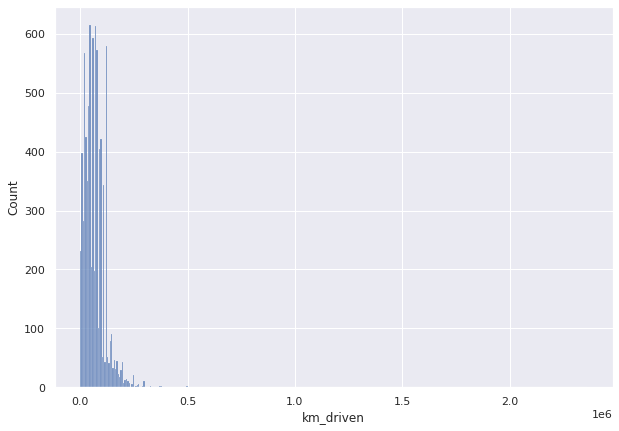

In [165]:
sns.histplot(df["km_driven"])

We see that the mean km driven is about 70000, which seems reasonable.

The minimum is 1, which is interesting. Could it be a new car? something to explore. Look at the number of owners.

The maximum is over 2 million km driven. This seems like a lot, so this needs to be explored.

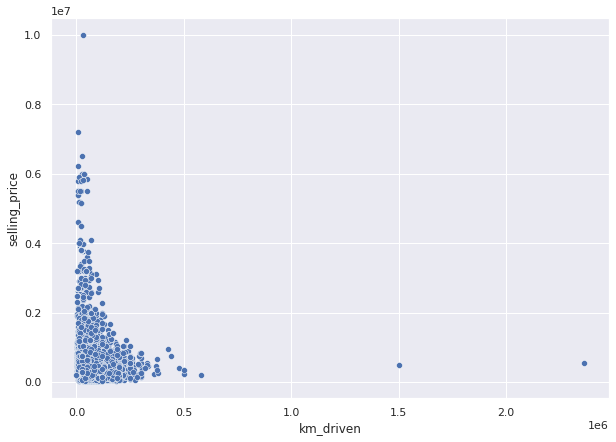

In [166]:
sns.scatterplot(data = df, x = "km_driven", y = "selling_price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


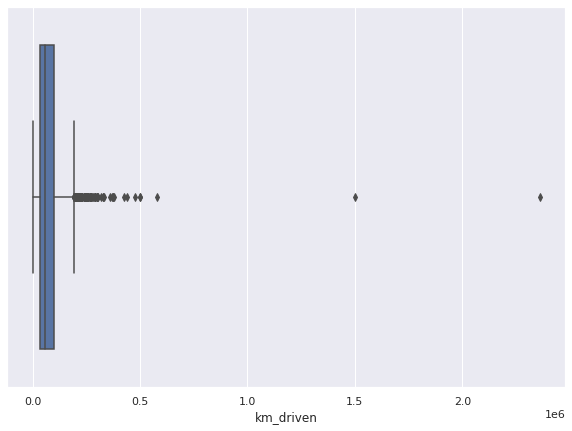

In [167]:
sns.boxplot(df["km_driven"])

In [168]:
df[df["km_driven"]>=400000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
1810,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,2.2,140.00,7.0,10
3486,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,1.2,81.83,5.0,15
3508,Maruti Wagon R LXI Minor,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.90,1.1,67.00,5.0,12
3641,Maruti Wagon R VXI BS IV,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.90,1.0,67.10,5.0,11
5106,Mahindra Scorpio M2DI,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.50,2.2,115.00,5.0,11
5189,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99,2.5,100.60,7.0,9
5467,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,2010,950000,426000,Diesel,Individual,Manual,First Owner,12.80,2.5,102.00,7.0,12
6673,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,2.5,100.57,7.0,11


In [413]:
#grouping age, and km_driven
stats = df.groupby("age")["km_driven"].describe()

In [415]:
stats.round(3)

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
2,74.0,20525.716,25257.833,1000.0,5000.0,7350.0,31500.0,120000.0
3,583.0,16307.901,14616.577,1300.0,7032.0,10500.0,20000.0,120000.0
4,807.0,33893.100,24089.286,1000.0,15000.0,30000.0,46000.0,150000.0
5,1018.0,46602.662,28591.508,2000.0,25538.0,40000.0,60000.0,227000.0
6,859.0,58929.235,33003.715,2118.0,35000.0,56494.0,78000.0,210000.0
7,776.0,71680.235,38499.677,5000.0,40000.0,63063.0,100000.0,248000.0
8,621.0,78841.459,42082.675,2350.0,50000.0,72000.0,100000.0,300000.0
9,670.0,85685.364,41834.427,7200.0,58343.0,79328.0,110000.0,440000.0
10,651.0,95627.731,72591.534,8500.0,63000.0,90000.0,120000.0,1500000.0


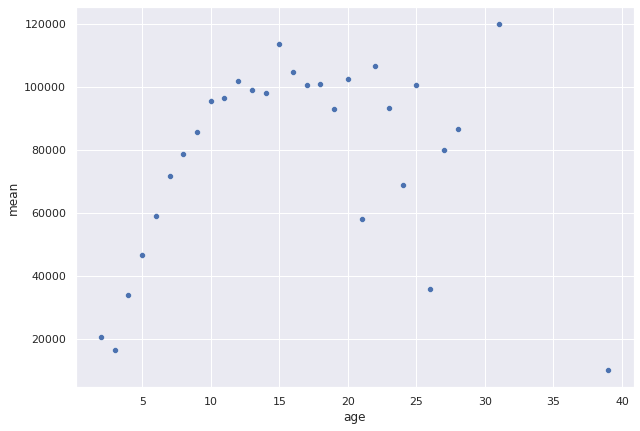

In [171]:
sns.scatterplot(x =stats.index , y =stats["mean"])

Looking at a scatter plot between the mean distance travelled for each age group, there seems to be a relationship.

In the beginning, up untill 15 years, the older the car is, the more miles travelled it has. However, the trend starts to flatten after that, and also dips.

I think it's reasonable to assume that the older the car, the higher km_driven it would have.

It seems unrealistic to me for a car to have 1.5 million km driven and over 2 million.

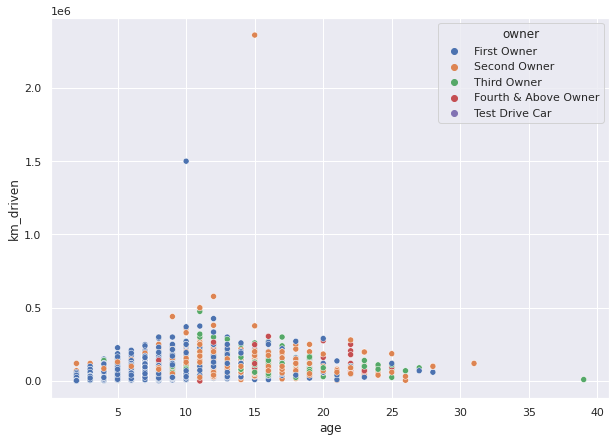

In [172]:
sns.scatterplot(data =df, x = "age", y=  "km_driven", hue = "owner")

###fuel

In [173]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

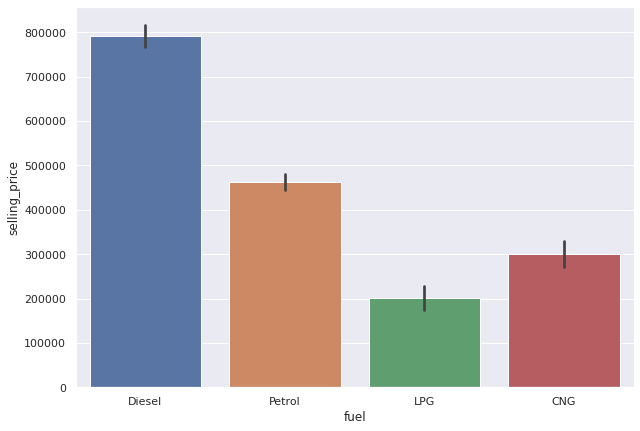

In [174]:
sns.barplot(x = df["fuel"], y = df["selling_price"])

We see that Diesel cars have the highest selling price. 

We see, however, that we have a lot more samples of diesel and petrol compared to LPG and CNG.

Is this sample distribution accurate to the real car market?

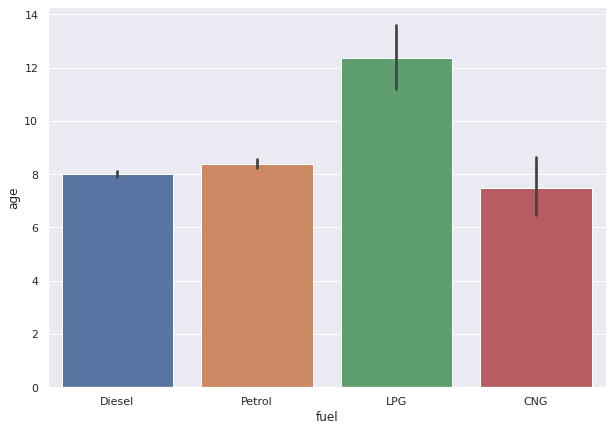

In [175]:
sns.barplot(x = df["fuel"], y = df["age"])

It seems that cars that run off LPG fuel are older, CNG being 
youngest.

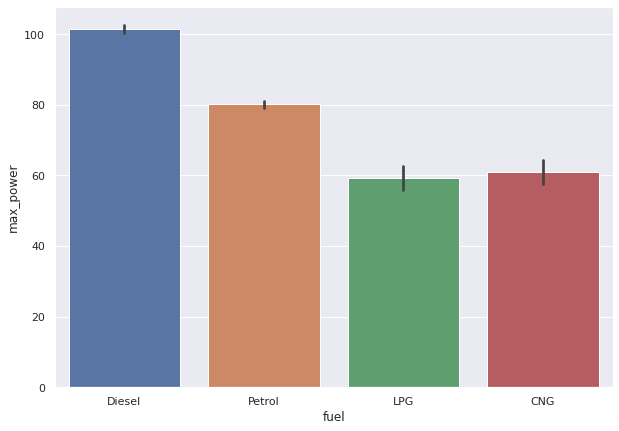

In [176]:
sns.barplot(x = df["fuel"], y = df["max_power"])

Seems that Diesel cars are more max_power

###seller_type

In [177]:
df["seller_type"].value_counts()/len(df["seller_type"])

Individual          0.832431
Dealer              0.138533
Trustmark Dealer    0.029035
Name: seller_type, dtype: float64

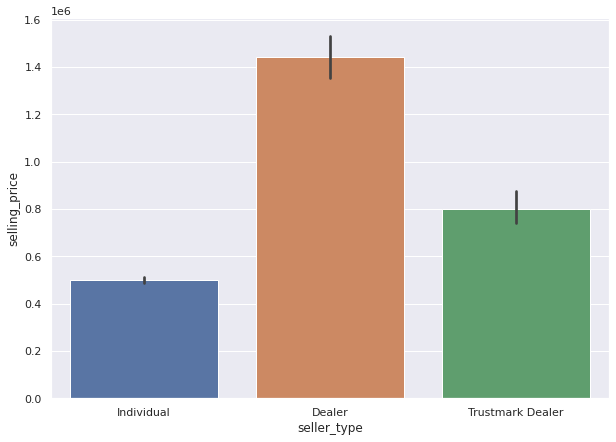

In [178]:
sns.barplot(x = df["seller_type"], y = df["selling_price"])

In [179]:
df.groupby("seller_type")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,1126.0,1.443494e+06,1.569286e+06,60000.0,475000.0,690000.0,1843750.0,6523000.0
Individual,6766.0,4.985612e+05,4.837797e+05,29999.0,240000.0,400000.0,615750.0,10000000.0
Trustmark Dealer,236.0,8.018390e+05,5.080779e+05,225000.0,550000.0,650000.0,779000.0,2000000.0


It seems that Dealers sell cars at a higher price compared to everyone else. Individual less. what could be the reasons for this? Maybe dealers aim to make a profit, and individuals maybe just want to get rid of a car.

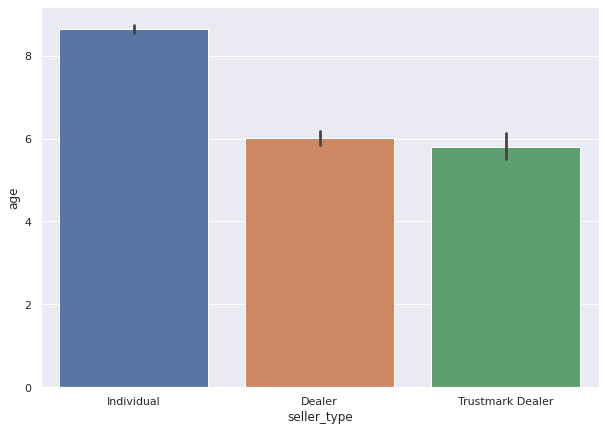

In [180]:
sns.barplot(x = df["seller_type"], y = df["age"])

Looking at the relationship with age, it seems individuals sell cars that are older, which could explain why they sell for the cheapest.

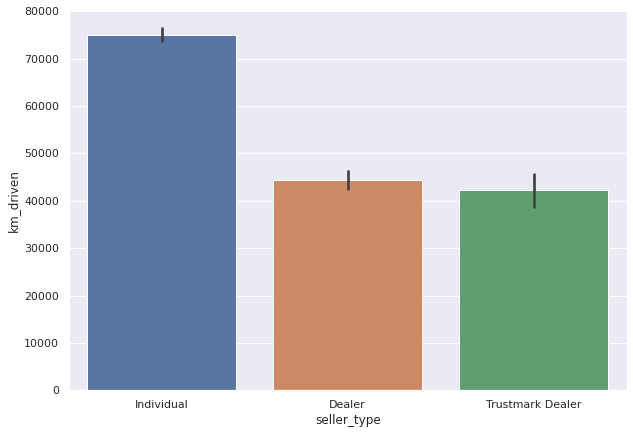

In [181]:
sns.barplot(x = df["seller_type"], y = df["km_driven"])

Individuals also sell cars with higher km_driven on them. This makes some sense since we found out that they also sell cars that are older.

###transmission

In [182]:
(df["transmission"].value_counts()/len(df["transmission"])).round(3)

Manual       0.871
Automatic    0.129
Name: transmission, dtype: float64

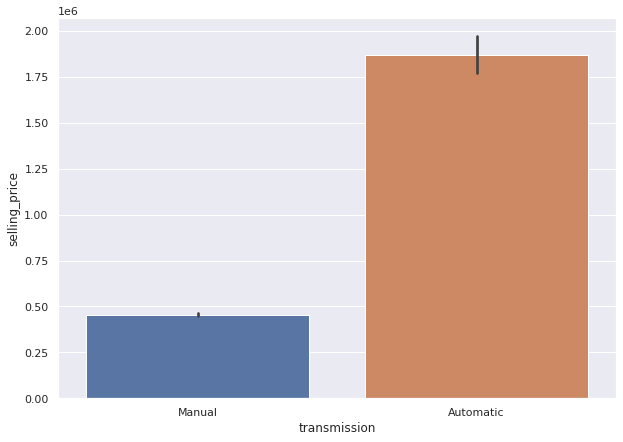

In [183]:
sns.barplot(x = df["transmission"], y = df["selling_price"])

87% of cars are manual, and about 13% are automatic. Is this distribution representative of the real world?

Automatic cars sell for a lot more than manual.

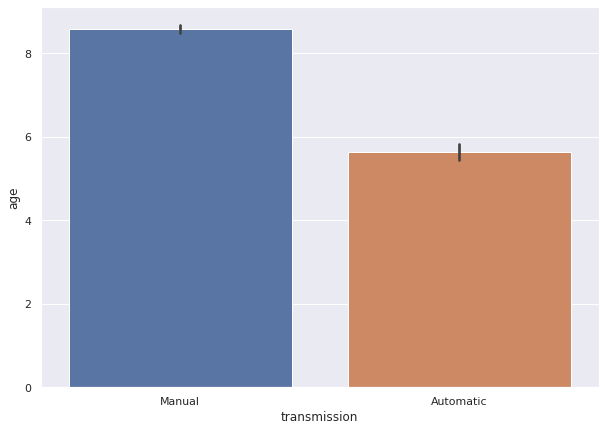

In [184]:
sns.barplot(x = df["transmission"], y = df["age"])

We also see that manual cars in the data set are alot older than automatic. Which could be a factor explaining the selling price difference.

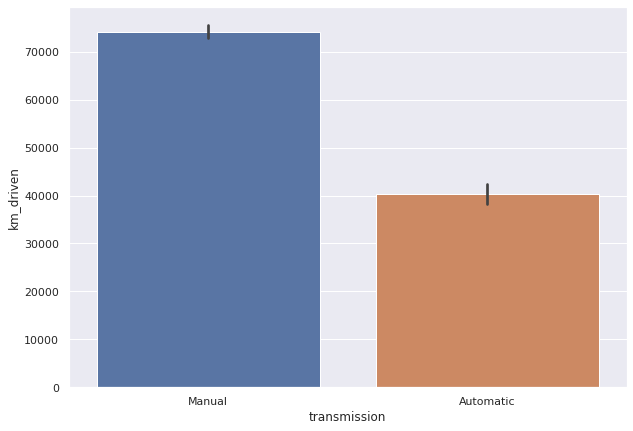

In [185]:
sns.barplot(x = df["transmission"], y = df["km_driven"])

Manual cars also have more km_driven on them in this dataset, which also could explain the selling price.

###owner

In [186]:
df["owner"].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

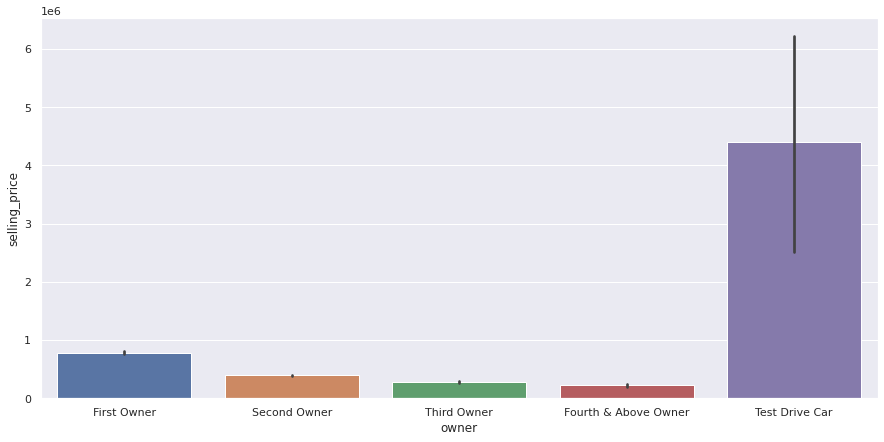

In [187]:
plt.figure(figsize=(15,7))
sns.barplot(x = df["owner"], y = df["selling_price"])

Test drive cars sell for the most, then first owner. However we only have 5 test drive cars. So is what we learn from this representative?

It seems that the more the owners, the less the car sells for. Also, maybe cheaper cars, have more owners? It could suggest that people tend to buy cars that are cheaper.

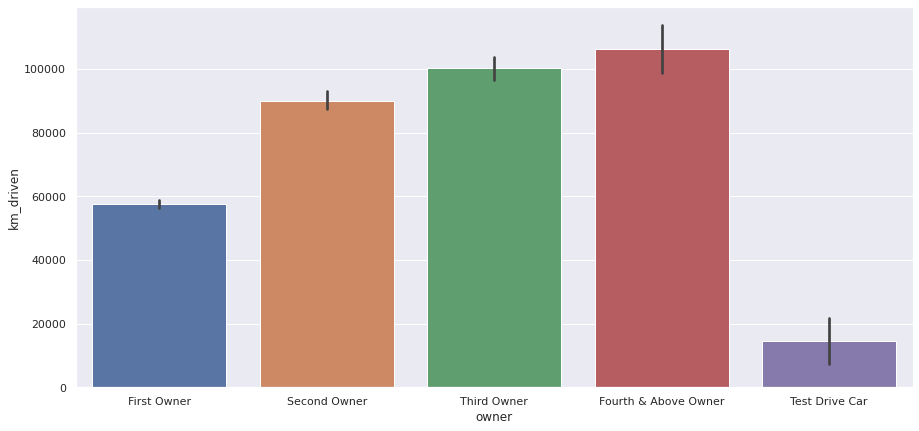

In [188]:
plt.figure(figsize=(15,7))
sns.barplot(x = df["owner"], y = df["km_driven"])

As what we expect a test drive car would have less km_driven, and the less number of owners a car has, the less km it would have on it. The more owners, the more km. This could be a reason as to why the selling price is low.

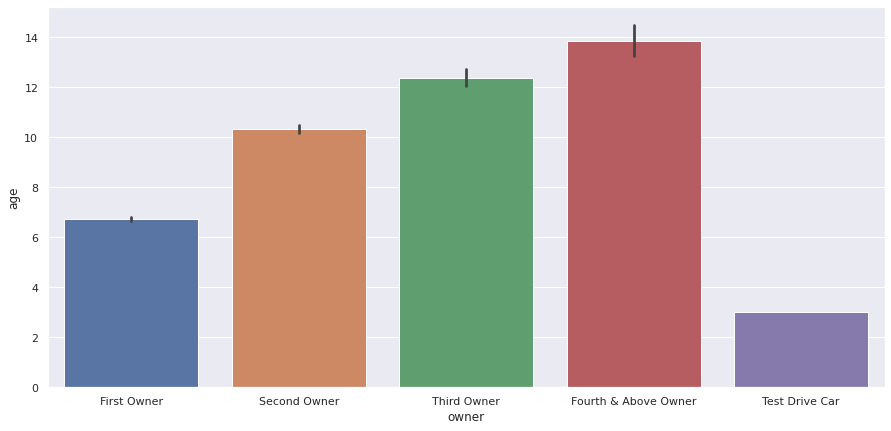

In [189]:
plt.figure(figsize=(15,7))
sns.barplot(x = df["owner"], y = df["age"])

This could be suggesting that older cars have more owners. Which could be what we expect. An older car would go through more owners, one reason could be its just been around for longer. Could this suggest that people also first cars for about 7 years before listing up for sale?


###engine

In [190]:
df["engine"].unique()

array([1.2, 1.5, 1.4, 1.3, 1.1, 0.8, 1. , nan, 1.6, 2.2, 3. , 2.5, 2.1,
       2.8, 2. , 1.8, 3.6, 2.4, 2.7, 0.6, 0.9, 1.9, 2.6, 3.2, 3.5])

Maybe make groups

1. [0,1] small
2. (1,2] med
3. (2, 3] large
4. (3,4] xlarge


In [191]:
small_engines = df[df["engine"]<=1]
med_engines = df[(df["engine"] > 1) & (df["engine"] <= 2)]
large_engines = df[(df["engine"] > 2) & (df["engine"] <= 3)]
xlarge_engines = df[df["engine"]>3]

Checking to see if there is a common fuel type depending on the size of the engine.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


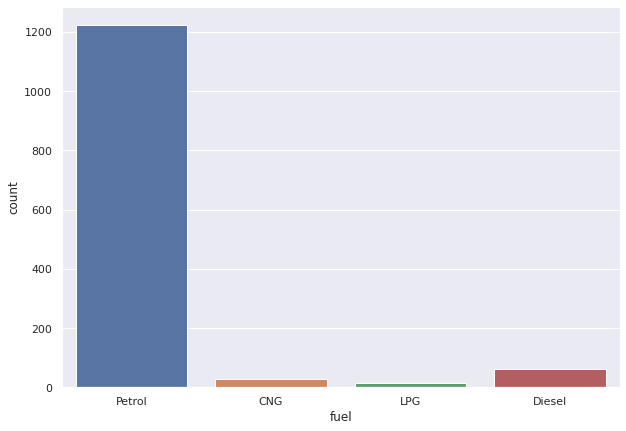

In [192]:
sns.countplot(small_engines["fuel"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


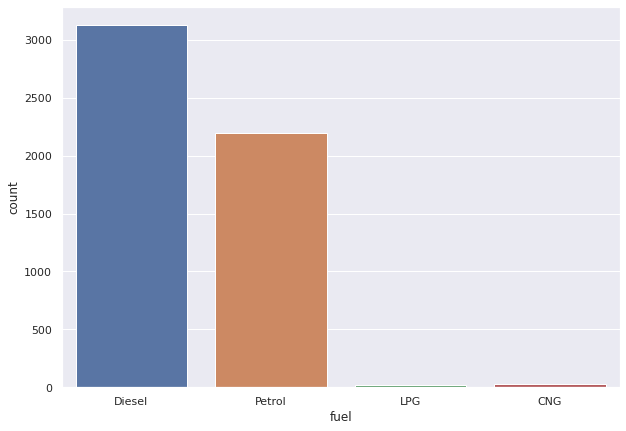

In [193]:
sns.countplot(med_engines["fuel"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


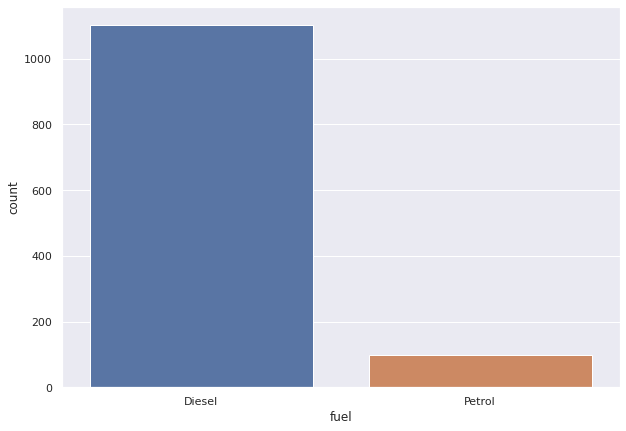

In [194]:
sns.countplot(large_engines["fuel"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


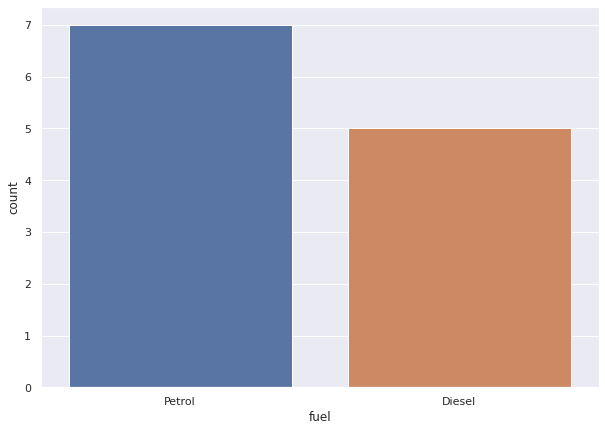

In [195]:
sns.countplot(xlarge_engines["fuel"])

The data shows that smaller cars, Less than 1l engines are pertrol, 1l-2l and 2-3l cars seem to be more Diesel.
Above 3ls, the data shows petrol, howver we only have 12 cars from this set, so this is not reasonable to conclude anything from that.

In [371]:
#creating a new catogorical column for the differnt engines sizes#]

df["engine_size"] = 0
df.loc[(df['engine'] > 0) & (df['engine'] <= 1), 'engine_size'] = 'small'
df.loc[(df['engine'] > 1) & (df['engine'] <= 2), 'engine_size'] = 'med'
df.loc[(df['engine'] > 2) & (df['engine'] <= 3), 'engine_size'] = 'large'
df.loc[(df['engine'] > 3) & (df['engine'] <= 4), 'engine_size'] = 'xlarge'

In [197]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8,med
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8,med
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16,med
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12,med
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15,med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1.2,82.85,5.0,9,med
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1.5,110.00,5.0,15,med
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1.2,73.90,5.0,13,med
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1.4,70.00,5.0,9,med


In [198]:
df["engine_size"].value_counts()/len(df["engine_size"])

med       0.659818
small     0.163755
large     0.147761
0         0.027190
xlarge    0.001476
Name: engine_size, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


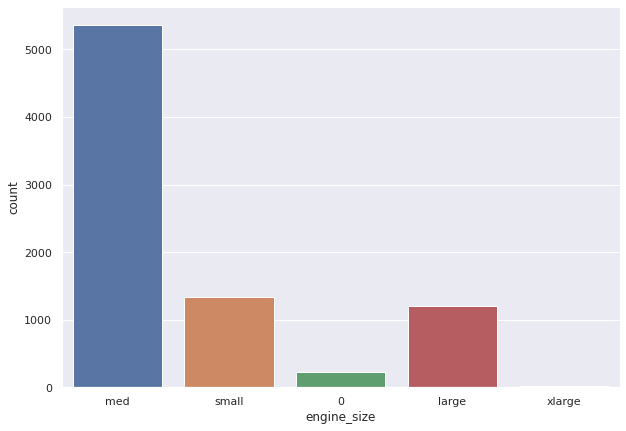

In [199]:
sns.countplot(df["engine_size"])

Most cars are med, so between 1-2l engines. Is this distribution representative of the real populuation?

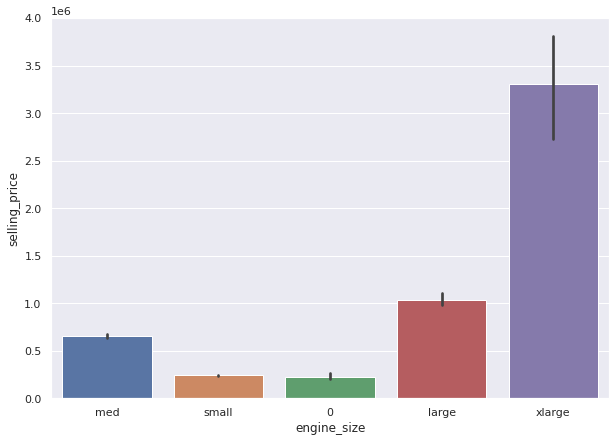

In [200]:
sns.barplot(data = df, x = "engine_size", y = "selling_price")

This chart shows that the the larger the engine size, the higher the selling price. However only 12 extra large cars.

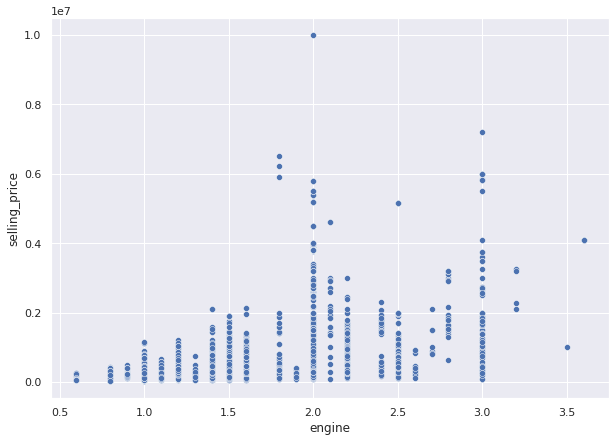

In [201]:
sns.scatterplot(data = df, x = "engine", y = "selling_price")

We see a strong positive linear correlation between engine size and selling price.

###max_power

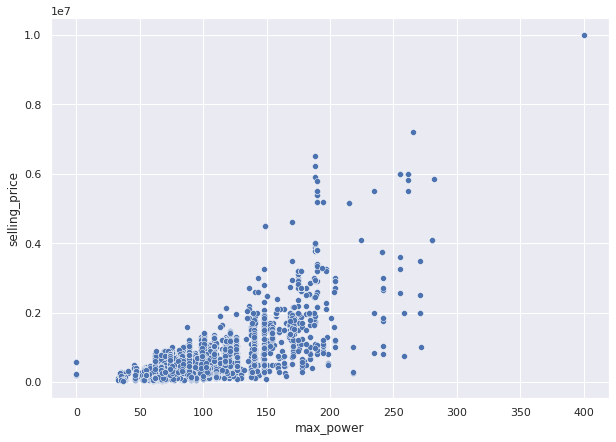

In [202]:
sns.scatterplot(data = df, x= "max_power", y = "selling_price")

It seems that the higher the power of a car, the more the selling price. One car seems to be way out in horsepower and price compared to everything in the data set. So we need to explore this.

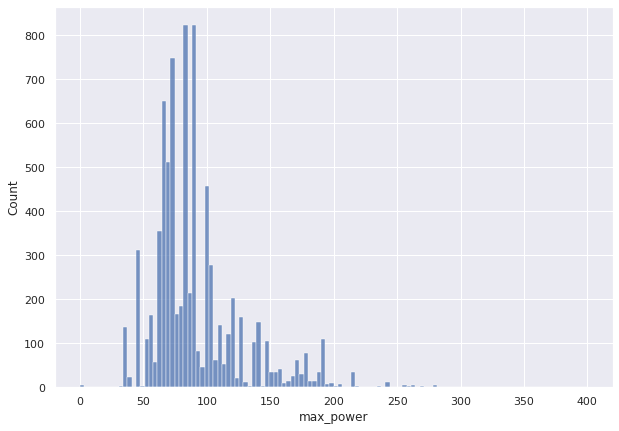

In [203]:
sns.histplot(df["max_power"])

There seems to be multiple peaks and dips in the data. However generally alot of the data is contained between 50, to 125 bhp.

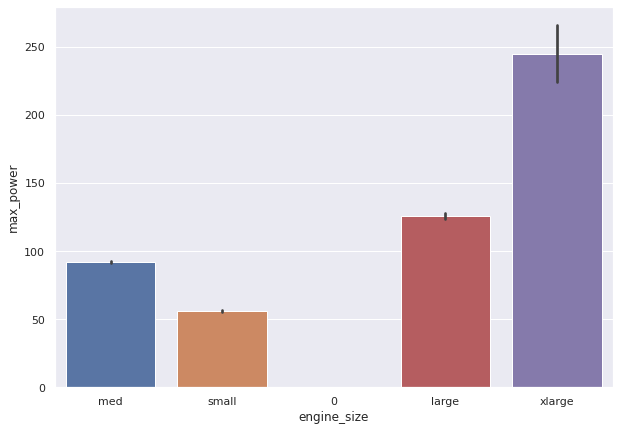

In [204]:
sns.barplot(data = df, x = "engine_size", y = "max_power")

It seems the larger the engine, the more the max power.

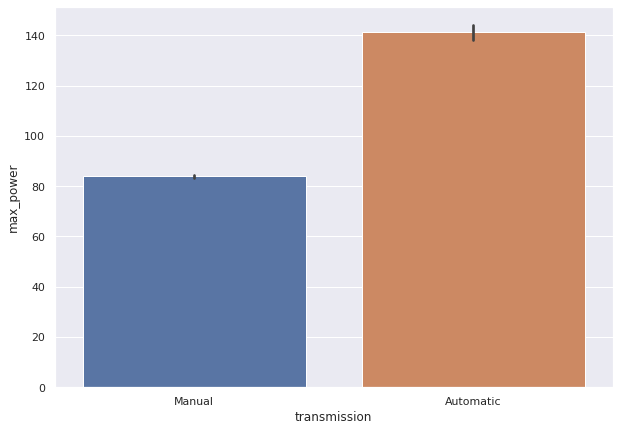

In [205]:
sns.barplot(data = df, x = "transmission", y = "max_power")

It seems automatic cars seem to be more powerful. However, only 13% of this dataset contains automatic cars. If this distribution between automatic and manual in our data set is not true for the real world, then we can't say anything. 

The automatic cars in this dataset, since they are so low, could just be powerful cars, and the dataset may not have captured enough information.

###seats

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


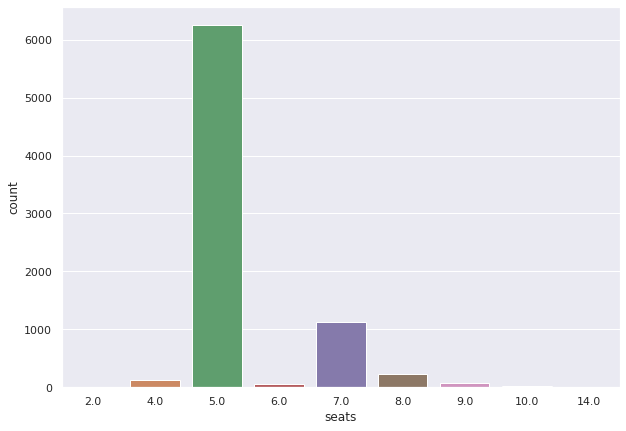

In [206]:
sns.countplot(df["seats"])

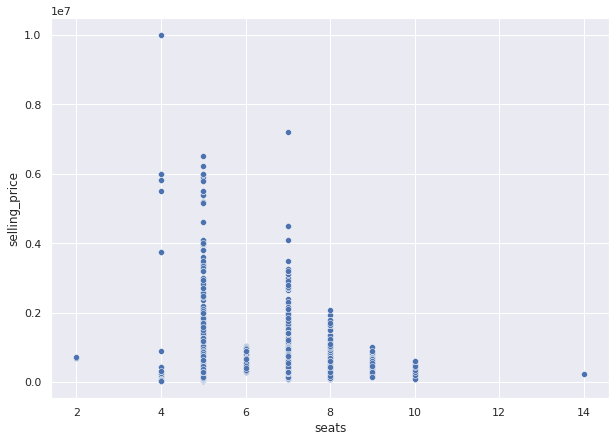

In [207]:
sns.scatterplot(data = df, x = "seats", y = "selling_price")

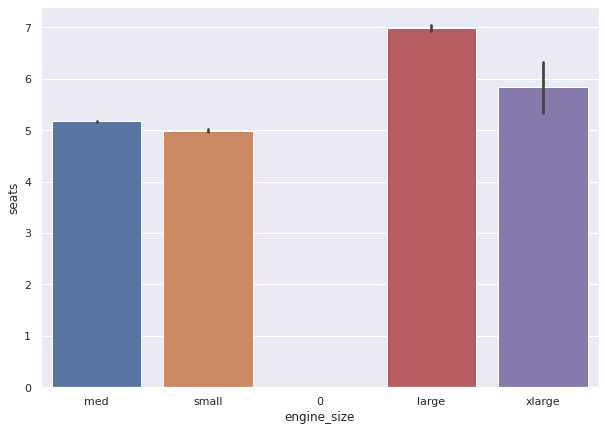

In [208]:
sns.barplot(data = df, x = "engine_size", y = "seats")

Most cars in this dataset contain 5 seats.  The scatterplot is sort of showing a negative correlation between seats and selling price. Almost like, the more the seats, the less the selling price. med and small engine cars have around 5 seats, however, the larger engines ones have more it seems.

###name

In [209]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8,med
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8,med
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16,med
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12,med
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15,med


I want to split the make of the car, and the model of the car. I want to see if the make of a car affects selling price.

In [372]:
df["name"]=df["name"].str.split(" ", 1) 

In [373]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size
0,"[Maruti, Swift Dzire VDI]",2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8,med
1,"[Skoda, Rapid 1.5 TDI Ambition]",2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8,med
2,"[Honda, City 2017-2020 EXi]",2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16,med
3,"[Hyundai, i20 Sportz Diesel]",2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12,med
4,"[Maruti, Swift VXI BSIII]",2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15,med


In [374]:
df["name"] = df["name"].astype(str)

In [375]:
df["name"] = df["name"].str.replace("[", "")
df["name"] = df["name"].str.replace("]", "")
df["name"] = df["name"].str.replace("'", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [376]:
df["name"][1]

'Skoda, Rapid 1.5 TDI Ambition'

In [377]:
df[["brand", "model"]] = df["name"].str.split(",", expand = True)

In [378]:
df = df.drop("name", axis=1)

In [379]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8,med,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8,med,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16,med,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12,med,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15,med,Maruti,Swift VXI BSIII


In [380]:
column_to_move = df.pop("brand")
df.insert(0, "brand", column_to_move)

In [381]:
column_to_move = df.pop("model")
df.insert(1, "model", column_to_move)


In [382]:
df.head()

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8,med
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8,med
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16,med
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12,med
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15,med


Now the brand and the model of the car have been seperated.

In [383]:
df["brand"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

I can visually see, that while trying to split the brand from the model, not everything split smoothly. Fore example "Land" should be "Land Rover".

In [384]:
df["brand"][df["brand"]=="Land"] = "Land Rover"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [385]:
df["model"] = df["model"].str.replace("Rover", "")


In [386]:
df[df["brand"]=="Land Rover"]

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size
135,Land Rover,Discovery Sport TD4 SE,2019,4500000,21000,Diesel,Dealer,Automatic,First Owner,12.83,2.0,148.31,7.0,3,med
2137,Land Rover,Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.00,2.2,115.00,5.0,9,large
3240,Land Rover,Discovery Sport TD4 SE,2019,4500000,21000,Diesel,Dealer,Automatic,First Owner,12.83,2.0,148.31,7.0,3,med
5257,Land Rover,Discovery Sport TD4 SE,2019,4500000,21000,Diesel,Dealer,Automatic,First Owner,12.83,2.0,148.31,7.0,3,med
6724,Land Rover,Range Evoque 2.2L Pure,2013,2000000,77500,Diesel,Individual,Automatic,Third Owner,12.70,2.2,187.70,5.0,9,large
7711,Land Rover,Discovery Sport TD4 SE,2019,4500000,21000,Diesel,Dealer,Automatic,First Owner,12.83,2.0,148.31,7.0,3,med


Thats been fixed

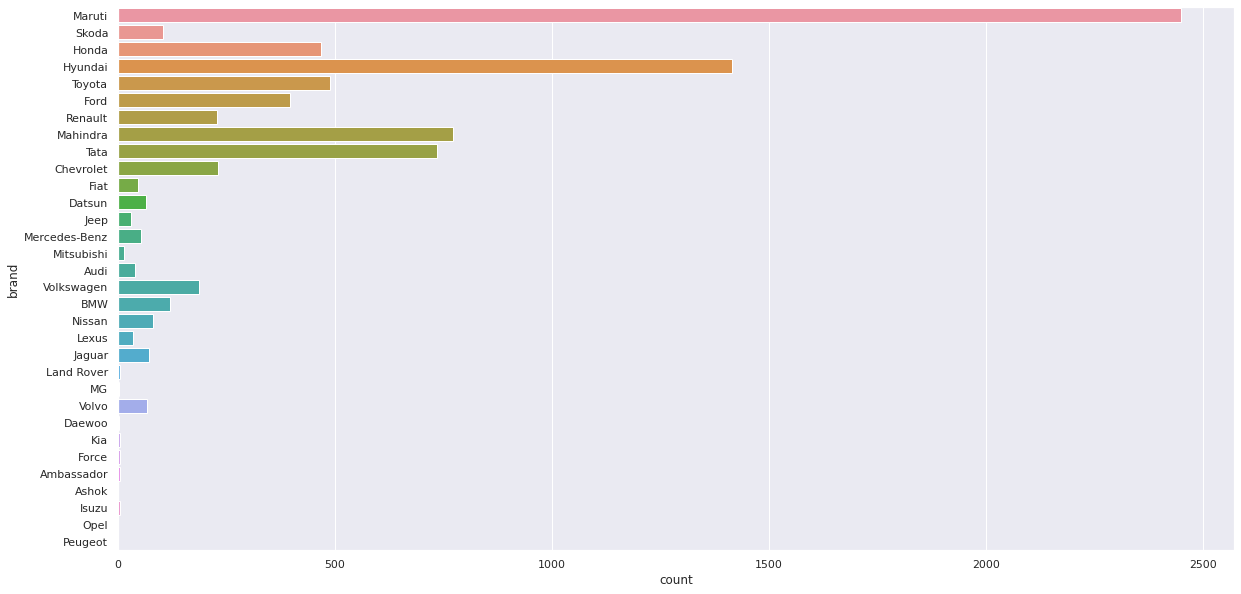

In [387]:
plt.figure(figsize=(20,10))

sns.countplot(y =df["brand"])

Maruti seems to be the most common brand, then Hyundai. Is this distribution representative?

Checking how the brand affects sales price

In [388]:
df["brand"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Toyota', 'Honda', 'Ford',
       'Chevrolet', 'Renault', 'Volkswagen', 'BMW', 'Skoda', 'Nissan',
       'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi', 'Lexus',
       'Jeep', 'Mitsubishi', 'Force', 'Land Rover', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

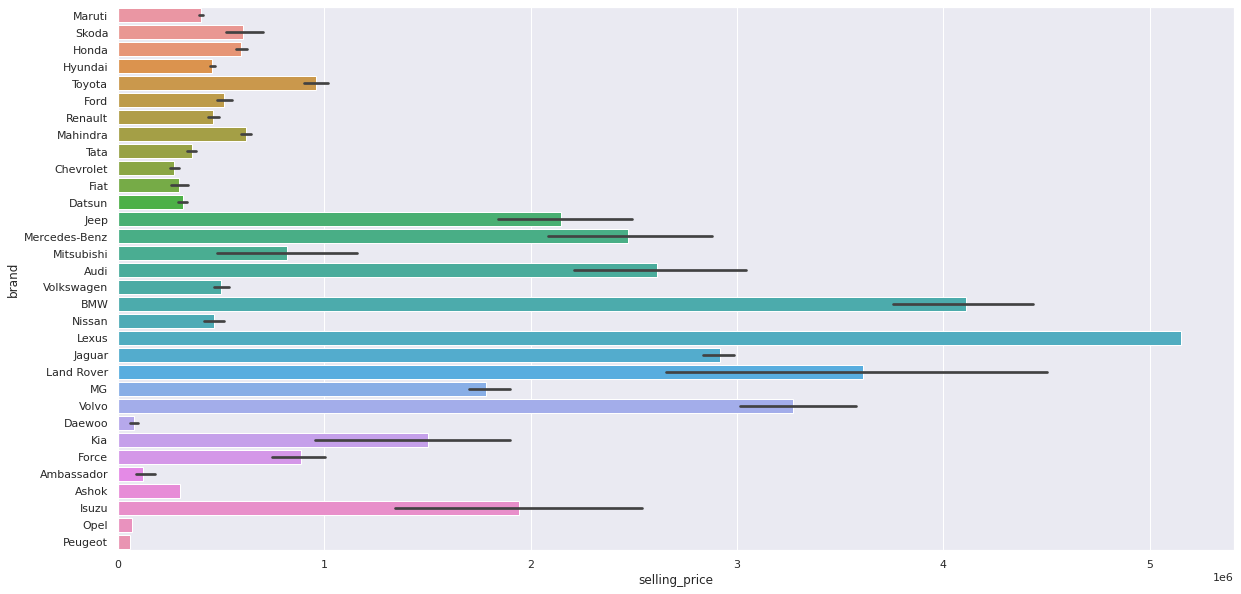

In [389]:
plt.figure(figsize=(20,10))
sns.barplot(y = df["brand"], x = df["selling_price"])

It does seem like selling price is affected by the brand. However, on certain brands we have more information compared to other brands.

###mileage

measured in kmpl (km per l)

In [228]:
df["mileage"]

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: float64

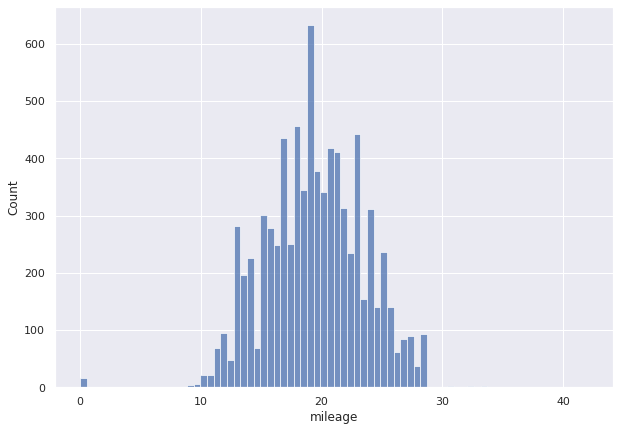

In [229]:
sns.histplot(df["mileage"])

Looks like its normally distriuted, majority of the data set between 15 and 25

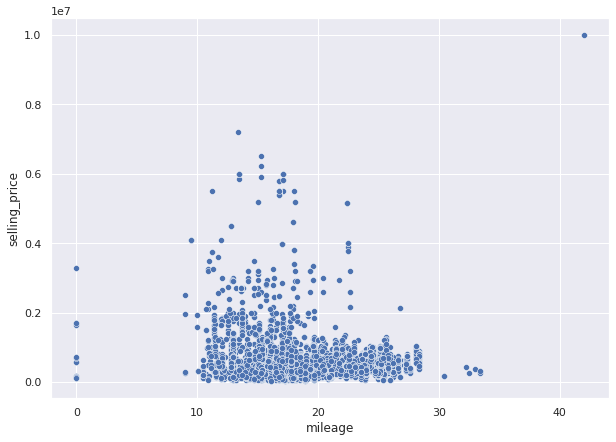

In [230]:
sns.scatterplot(data = df, x ="mileage", y = "selling_price")

Doesnt seem to be too much of a strong relationship between mileage and selling price

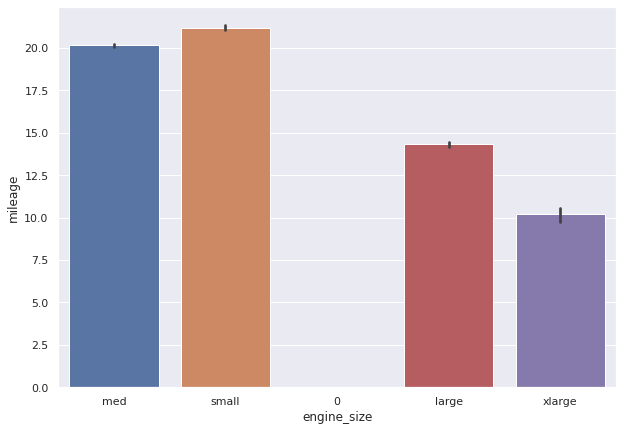

In [231]:
sns.barplot(data = df, x = "engine_size", y = "mileage")

It seems that smaller cars, and med cars, have more better mileage than bigger cars

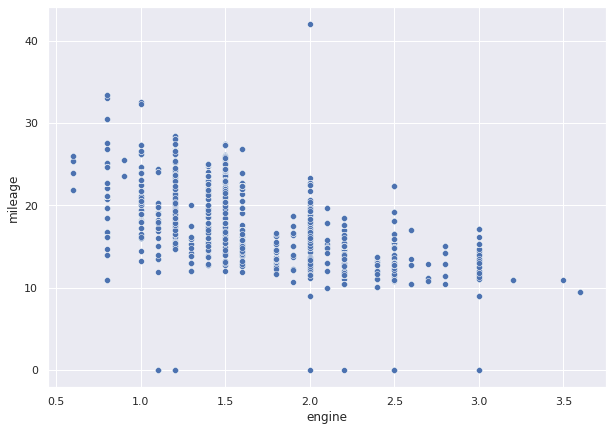

In [232]:
sns.scatterplot(data = df, x = "engine", y = "mileage")

It seems to be, that the bigger the engine size, the less the mileage.

Also there are a few points with 0 mileage. This needs to be fixed. However saying this, mileage does not seem to have a strong relationship with selling price, i might drop this column.

###selling_price

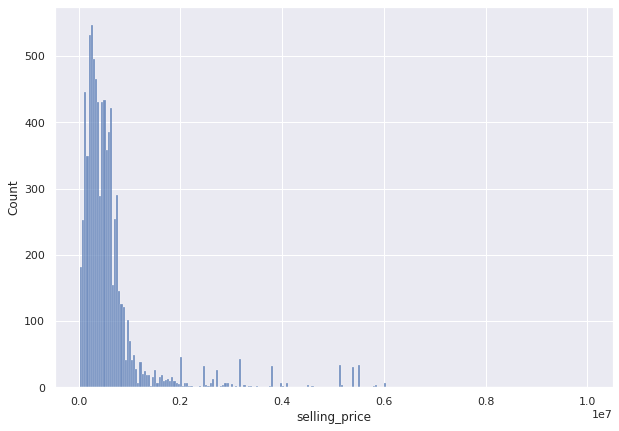

In [233]:
sns.histplot(df["selling_price"])

##Data Preprocessing
1. Outliers 
2. Missing Values
3. Encoding data
4. Splitting Data

###Missing Data

Replace missing data with the mean of each column

In [390]:
df[df.isna().any(axis=1)]

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,engine_size
13,Maruti,Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,15,0
31,Fiat,Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,19,0
78,Tata,Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,19,0
87,Maruti,Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,7,0
119,Maruti,Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota,Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,22,0
7996,Hyundai,Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,22,0
8009,Hyundai,Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,16,0
8068,Ford,Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,0


In [391]:
len(df[df.isna().any(axis=1)])/len(df)

0.027312992125984252

We have 222 rows with NaN values. Which is about 2.7% of the dataset. 

1. Removing these rows would be an easy thing to do since the dataset is fairly large.

2. If we know from the dataset that a certain model of a car has certain specific features, can we just copy that into the missing ones? For example, if car A from 2010 is known to be a 5 seater, with a 1.4L engine. Can I assign this to a row of car A with missing data? So using the information we know about Car A from the dataset, to fill out missing values.

3. Replace the columns with the average of that column.

I choose to use option 3 for now.

In [392]:
df = df.drop("engine_size", axis = 1)

In [393]:
df.isnull().sum()

brand              0
model              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
age                0
dtype: int64

In [394]:
#filling NaN values using the mean of each column
for i in df.columns[df.isnull().any(axis=0)]: 
    df[i].fillna(df[i].mean(),inplace=True)


source: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns

In [396]:
#filling 0 values using the mean of each column
for i in df.columns[(df==0).any(axis = 0)]:
  df[i]=df[i].replace(0,df[i].mean())


In [397]:
df.isnull().sum()

brand            0
model            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
age              0
dtype: int64

In [398]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


year               2013.804011
selling_price    638271.807702
km_driven         69819.510827
mileage              19.459398
engine                1.457506
max_power            91.585477
seats                 5.416719
age                   8.195989
dtype: float64

In [399]:
#just checking to see that the means have replaced the NaN values, and they have
df.loc[13]

brand                    Maruti
model             Swift 1.3 VXi
year                       2007
selling_price            200000
km_driven                 80000
fuel                     Petrol
seller_type          Individual
transmission             Manual
owner              Second Owner
mileage               19.418783
engine                 1.457506
max_power             91.517919
seats                  5.416719
age                          15
Name: 13, dtype: object

In [400]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,age
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.459398,1.457506,91.585477,5.416719,8.195989
std,4.044249,8.062534e+05,5.655055e+04,3.881351,0.502346,35.255596,0.946450,4.044249
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,0.600000,32.800000,2.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1.200000,69.000000,5.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1.200000,83.100000,5.000000,7.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1.600000,101.250000,5.000000,11.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3.600000,400.000000,14.000000,39.000000


- Null valuees have been removed.
- Columns have been converted to more apporopiate data types
- Removed unwanted columns

###Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


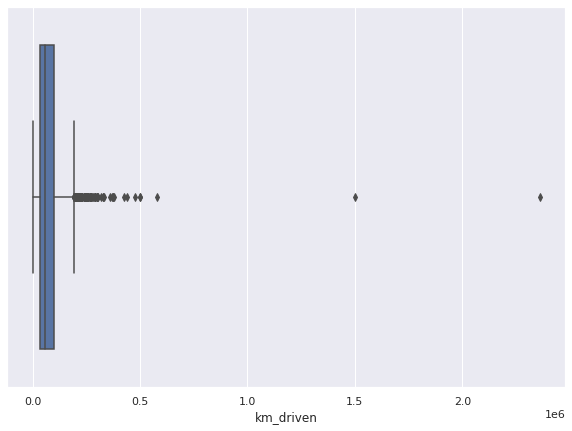

In [401]:
sns.boxplot(df["km_driven"])

In [402]:
df[df["km_driven"]>=600000]

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
1810,Mahindra,XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1,2.2,140.00,7.0,10
3486,Hyundai,i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1.2,81.83,5.0,15


In [412]:
len(df[df["km_driven"]<=10000])/len(df["km_driven"])

0.0688976377952756

It seems unrealistic to me for a car to have over a million km driven on it. Because, would the parts of the car even hold up? It is possible if someone constantly did repairs and maintenance. However, I don't think its that realistic. 

Also, a car with above 4 owners to only have 1 km driven on it.

I am going to cap these.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


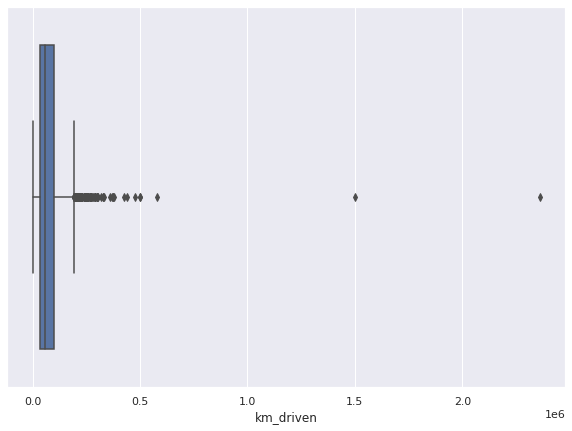

In [347]:
sns.boxplot(df["km_driven"])

In [426]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3 - Q1

whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

df["km_driven"] = np.where(df["km_driven"]>=600000, upper_whisker,df["km_driven"])
df["km_driven"] = np.where(df["km_driven"]<=100, df["km_driven"].median(),df["km_driven"])

In [427]:
df.loc[1810]

brand                  Mahindra
model             XUV500 W6 2WD
year                       2012
selling_price            500000
km_driven              192500.0
fuel                     Diesel
seller_type          Individual
transmission             Manual
owner               First Owner
mileage                    15.1
engine                      2.2
max_power                 140.0
seats                       7.0
age                          10
Name: 1810, dtype: object

In [428]:
df.describe().round(1)

,year,selling_price,km_driven,mileage,engine,max_power,seats,age
count,8128.0,8128.0,8128.0,8128.0,8128.0,8128.0,8128.0,8128.0
mean,2013.8,638271.8,69399.3,19.5,1.5,91.6,5.4,8.2
std,4.0,806253.4,47995.8,3.9,0.5,35.3,0.9,4.0
min,1983.0,29999.0,1000.0,9.0,0.6,32.8,2.0,2.0
25%,2011.0,254999.0,35000.0,16.8,1.2,69.0,5.0,5.0
50%,2015.0,450000.0,60000.0,19.4,1.2,83.1,5.0,7.0
75%,2017.0,675000.0,98000.0,22.3,1.6,101.2,5.0,11.0
max,2020.0,10000000.0,577414.0,42.0,3.6,400.0,14.0,39.0


###Encoding catogorical variables
1. fuel	
2. seller_type	
3. transmission	
4. owner
5. brand

In [429]:
df.head()

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti,Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5.0,8
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5.0,8
2,Honda,City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5.0,16
3,Hyundai,i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5.0,12
4,Maruti,Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5.0,15


In [431]:
df2 = df.copy()
df2 = df2.drop([ "model", "year"], axis = 1)

In [432]:
df2["owner"].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [433]:
# replacing values
df2["owner"].replace(["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"],
                        [1,2,3,4,0], inplace=True)

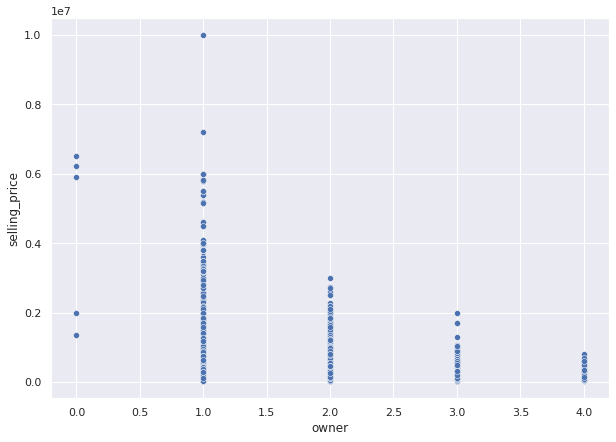

In [434]:
sns.scatterplot(data = df2, x = "owner", y = "selling_price")

In [435]:
df2=pd.get_dummies(df2,columns=["transmission","seller_type", "fuel", "brand"],drop_first=True)

In [438]:
df2.columns

Index(['selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'seats', 'age', 'transmission_Manual', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Land Rover', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_Opel', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo'],
      dtype='object')

In [439]:
df2

,selling_price,km_driven,owner,mileage,engine,max_power,seats,age,transmission_Manual,seller_type_Individual,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,450000,145500.0,1,23.40,1.2,74.00,5.0,8,1,1,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000.0,2,21.14,1.5,103.52,5.0,8,1,1,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000.0,3,17.70,1.5,78.00,5.0,16,1,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000.0,1,23.00,1.4,90.00,5.0,12,1,1,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000.0,1,16.10,1.3,88.20,5.0,15,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000.0,1,18.50,1.2,82.85,5.0,9,1,1,...,0,0,0,0,0,0,0,0,0,0
8124,135000,119000.0,4,16.80,1.5,110.00,5.0,15,1,1,...,0,0,0,0,0,0,0,0,0,0
8125,382000,120000.0,1,19.30,1.2,73.90,5.0,13,1,1,...,0,0,0,0,0,0,0,0,0,0
8126,290000,25000.0,1,23.57,1.4,70.00,5.0,9,1,1,...,0,0,0,0,0,0,1,0,0,0


##Correlation

Looking at correlation between DV and IV

5 assumptions of a lm:
1. Linearity: The relationship between X and the mean of Y is linear.
2. No or little multicollinearity.
3. Homoscedasticity: The variance of residual is the same for any value of X.
4. Independence: Observations are independent of each other.
5. Normality: For any fixed value of X, Y is normally distributed.

In [440]:
df2.corr()["selling_price"].sort_values(ascending = False).round(3)        

selling_price                   1.000
max_power                       0.746
brand_BMW                       0.527
engine                          0.454
brand_Lexus                     0.363
brand_Volvo                     0.298
brand_Jaguar                    0.265
fuel_Diesel                     0.207
brand_Mercedes-Benz             0.186
brand_Audi                      0.172
brand_Jeep                      0.116
brand_Toyota                    0.101
brand_Land Rover                0.100
seats                           0.041
brand_Isuzu                     0.040
seller_type_Trustmark Dealer    0.035
brand_MG                        0.027
brand_Kia                       0.024
brand_Mitsubishi                0.009
brand_Force                     0.008
brand_Skoda                    -0.004
brand_Ashok                    -0.005
brand_Mahindra                 -0.006
brand_Opel                     -0.008
brand_Peugeot                  -0.008
brand_Honda                    -0.013
brand_Daewoo

features with strong possitive correlations:
1. selling_price  :                 1.000
2. max_power      :                 0.745
3. brand_BMW    :                   0.527
3. engine       :                   0.454
4. brand_Lexus   :                  0.363
5. brand_Volvo    :                 0.298
6. brand_Jaguar    :                0.265
7. fuel_Diesel      :               0.207
8. brand_Mercedes-Benz:             0.186
9. brand_Audi          :            0.172
10. brand_Jeep          :            0.116
11. brand_Toyota         :           0.101
12. brand_Land Rover      :          0.100

features with strong negative correlations:
13. brand_Hyundai    :               -0.102
14. brand_Tata         :             -0.110
15. mileage              :           -0.125
16. brand_Maruti           :          -0.192
17. fuel_Petrol               :      -0.196
18. km_driven                   :    -0.226
19. owner                         :  -0.243
20. seller_type_Individual        :  -0.386
21. age                             :-0.414
22. transmission_Manual            : -0.589

Next is checking for multicollinearity.

In [441]:
df2.corr()["selling_price"].sort_values(ascending = False).index

Index(['selling_price', 'max_power', 'brand_BMW', 'engine', 'brand_Lexus',
       'brand_Volvo', 'brand_Jaguar', 'fuel_Diesel', 'brand_Mercedes-Benz',
       'brand_Audi', 'brand_Jeep', 'brand_Toyota', 'brand_Land Rover', 'seats',
       'brand_Isuzu', 'seller_type_Trustmark Dealer', 'brand_MG', 'brand_Kia',
       'brand_Mitsubishi', 'brand_Force', 'brand_Skoda', 'brand_Ashok',
       'brand_Mahindra', 'brand_Opel', 'brand_Peugeot', 'brand_Honda',
       'brand_Daewoo', 'brand_Nissan', 'brand_Volkswagen', 'brand_Fiat',
       'brand_Ford', 'brand_Datsun', 'brand_Renault', 'fuel_LPG',
       'brand_Chevrolet', 'brand_Hyundai', 'brand_Tata', 'mileage',
       'brand_Maruti', 'fuel_Petrol', 'owner', 'km_driven',
       'seller_type_Individual', 'age', 'transmission_Manual'],
      dtype='object')

In [477]:
df3 = df2[['selling_price', 'max_power', 'brand_BMW', 'engine', 'brand_Lexus',
       'brand_Volvo', 'brand_Jaguar', 'fuel_Diesel', 'brand_Mercedes-Benz',
       'brand_Audi', 'brand_Jeep', 'brand_Toyota', 'brand_Land Rover','brand_Hyundai', 'brand_Tata', 'mileage',
       'brand_Maruti', 'km_driven', 'owner',
       'seller_type_Individual', 'age', 'transmission_Manual']].copy()
#df3 = df2.copy()

Text(0.5, 1.0, 'Correlation Matrix')

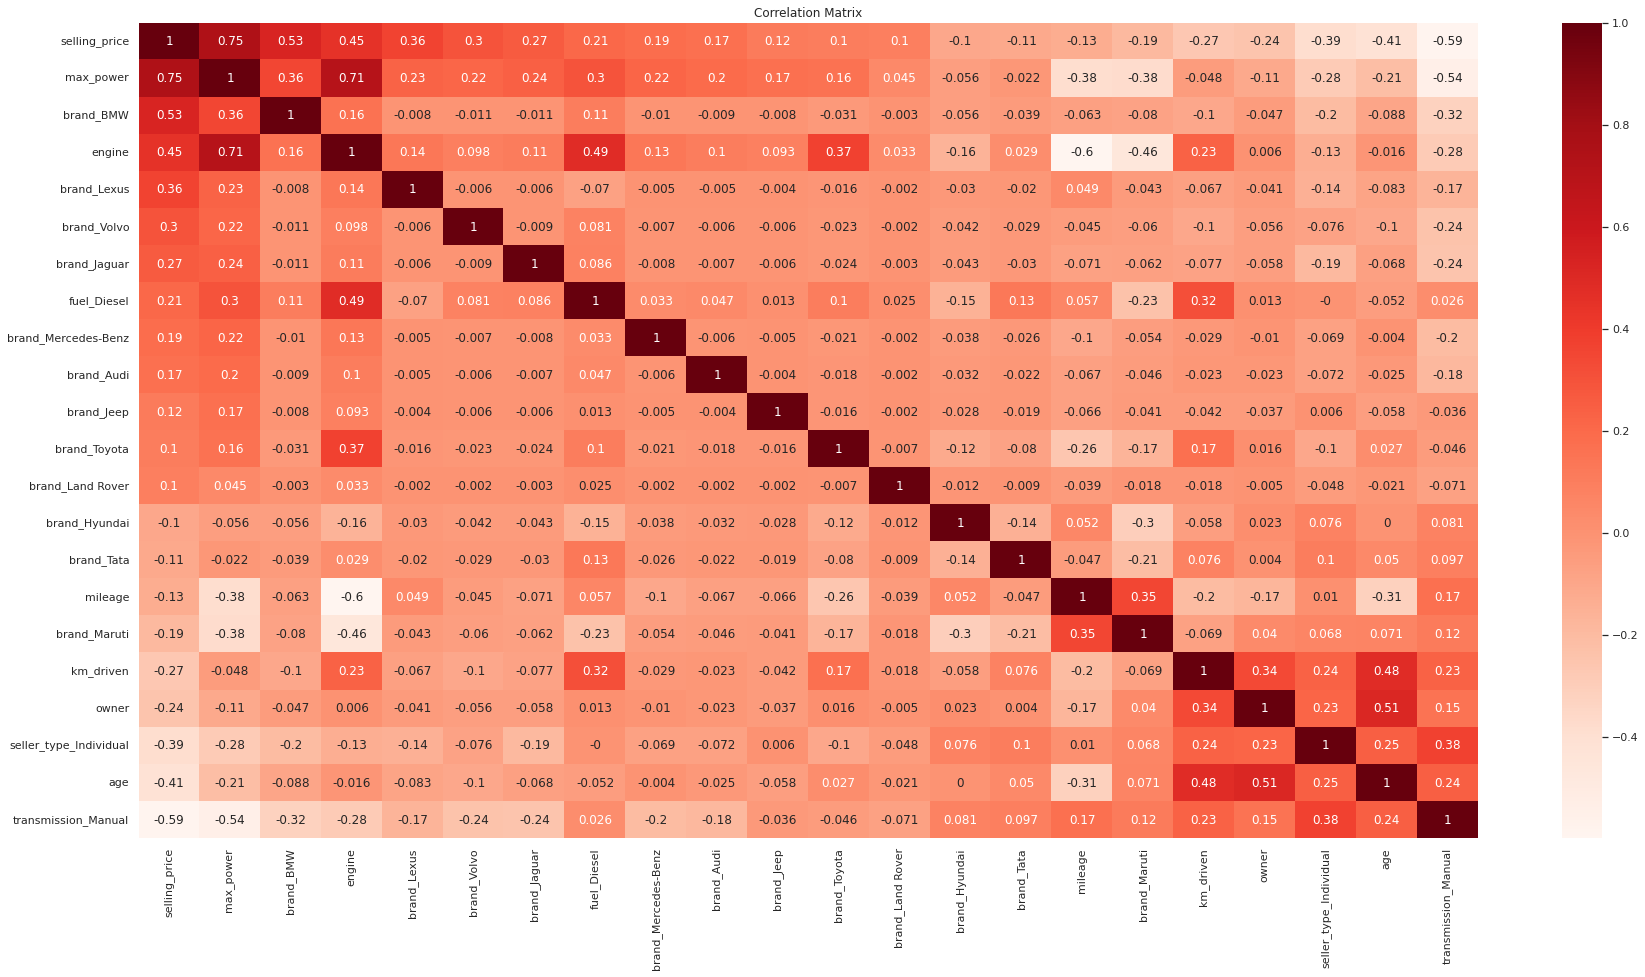

In [478]:
plt.figure(figsize=(30,15))
sns.heatmap(df3.corr().round(3), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

1. transmission_Manual seems to be highly correlated with alot of features. So might remove this one.
2. age is highgly correlated with km_driven.
3. engine is highly correlated with max_power

##Splitting independant variables (features) and dependant variable

In [479]:
df3.head()

,selling_price,max_power,brand_BMW,engine,brand_Lexus,brand_Volvo,brand_Jaguar,fuel_Diesel,brand_Mercedes-Benz,brand_Audi,...,brand_Land Rover,brand_Hyundai,brand_Tata,mileage,brand_Maruti,km_driven,owner,seller_type_Individual,age,transmission_Manual
0,450000,74.00,0,1.2,0,0,0,1,0,0,...,0,0,0,23.40,1,145500.0,1,1,8,1
1,370000,103.52,0,1.5,0,0,0,1,0,0,...,0,0,0,21.14,0,120000.0,2,1,8,1
2,158000,78.00,0,1.5,0,0,0,0,0,0,...,0,0,0,17.70,0,140000.0,3,1,16,1
3,225000,90.00,0,1.4,0,0,0,1,0,0,...,0,1,0,23.00,0,127000.0,1,1,12,1
4,130000,88.20,0,1.3,0,0,0,0,0,0,...,0,0,0,16.10,1,120000.0,1,1,15,1


In [480]:
X = df3.drop("selling_price", axis = 1).copy()
y = df3["selling_price"].copy()

In [481]:
X.head()

,max_power,brand_BMW,engine,brand_Lexus,brand_Volvo,brand_Jaguar,fuel_Diesel,brand_Mercedes-Benz,brand_Audi,brand_Jeep,...,brand_Land Rover,brand_Hyundai,brand_Tata,mileage,brand_Maruti,km_driven,owner,seller_type_Individual,age,transmission_Manual
0,74.00,0,1.2,0,0,0,1,0,0,0,...,0,0,0,23.40,1,145500.0,1,1,8,1
1,103.52,0,1.5,0,0,0,1,0,0,0,...,0,0,0,21.14,0,120000.0,2,1,8,1
2,78.00,0,1.5,0,0,0,0,0,0,0,...,0,0,0,17.70,0,140000.0,3,1,16,1
3,90.00,0,1.4,0,0,0,1,0,0,0,...,0,1,0,23.00,0,127000.0,1,1,12,1
4,88.20,0,1.3,0,0,0,0,0,0,0,...,0,0,0,16.10,1,120000.0,1,1,15,1


In [482]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

##Model Building
1. Splitting test and train
2. Simple LM

###Splitting test and train

In [483]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [484]:
X_train.head()

,max_power,brand_BMW,engine,brand_Lexus,brand_Volvo,brand_Jaguar,fuel_Diesel,brand_Mercedes-Benz,brand_Audi,brand_Jeep,...,brand_Land Rover,brand_Hyundai,brand_Tata,mileage,brand_Maruti,km_driven,owner,seller_type_Individual,age,transmission_Manual
7039,163.7,0,2.0,0,0,0,1,0,0,0,...,0,0,0,14.81,0,155000.0,1,1,7,0
4702,87.2,0,1.4,0,0,0,1,0,0,0,...,0,0,0,21.43,0,120000.0,2,1,12,1
481,67.1,0,1.0,0,0,0,0,0,0,0,...,0,0,0,18.90,1,80000.0,1,1,11,1
1786,115.0,0,2.2,0,0,0,1,0,0,0,...,0,0,0,13.50,0,160500.0,4,1,12,1
401,70.0,0,1.4,0,0,0,1,0,0,0,...,0,0,1,17.00,0,265000.0,2,1,10,1


In [485]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[["max_power", "engine", "km_driven", "owner", "age", "mileage"]] = sc.fit_transform(X_train[["max_power", "engine", "km_driven", "owner", "age", "mileage"]])
X_test[["max_power", "engine", "km_driven", "owner", "age", "mileage"]] = sc.transform(X_test[["max_power", "engine", "km_driven", "owner", "age", "mileage"]])

###MLM

In [486]:
import statsmodels.api as sm

In [487]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [488]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1694.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:36:12   Log-Likelihood:                -91525.
No. Observations:                6502   AIC:                         1.831e+05
Df Residuals:                    6480   BIC:                         1.832e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.74

In [491]:
pred = model.predict(X_test)

In [492]:
#predict on the train data using the model 
pred_train = model.predict(X_train)
error_train = y_train-pred_train

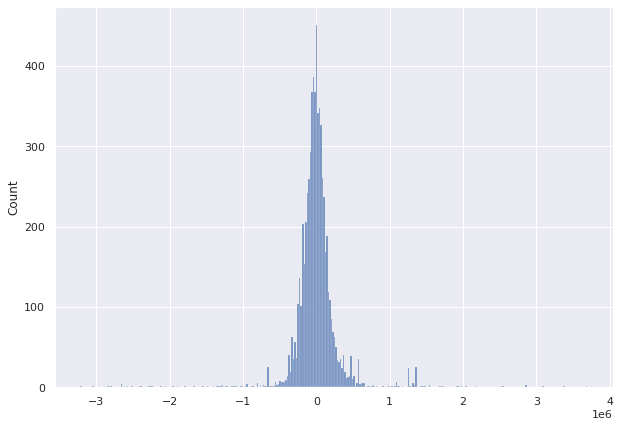

In [493]:
sns.histplot(model.resid)

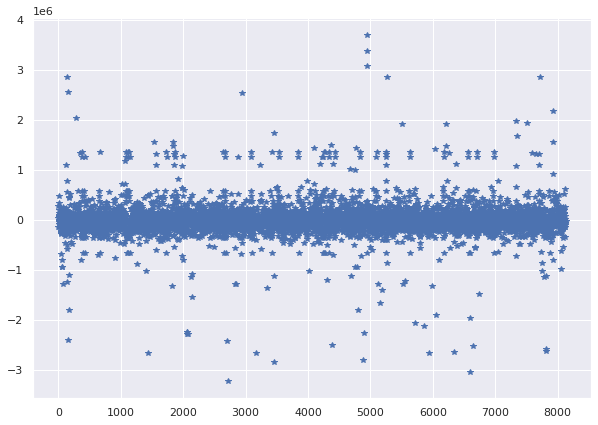

In [494]:
plt.plot(model.resid, "*")

The residuals are normally distributed, there does not seem to be a clear pattern. So this assumption is satisfied.

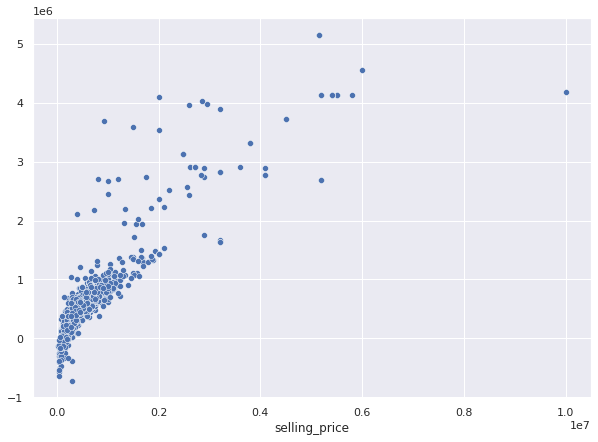

In [495]:
sns.scatterplot(x= y_test, y=pred)

Looking at the coefficients, all are statisiclly significant at a 5% alpha level which is good.

The model has an adjusted R squared value of 84.5%. Which means that the model explains 84.5% of the variation from the data

##Questions that come up

1. Is there an trend in selling price over the years? and does there seem to be some seasonal effect?
2. What is the distribution of fuel type? is it representative of in the real world?
3. Whats the most common seller type? Does the type of seller give an idea of what the price would be?
4. Transmission type and sale price relationship?
5. correlation between all the variable and sales?

##Summary

- Performed EDA analysis.
- Data cleaning and formatting.
- Multivariate Linear Regression Model